In [ ]:
import cvxpy as cp
import numpy as np
import itertools

In [ ]:
n_a = 4
r = cp.Variable(n_a)
pairs = map(list, itertools.combinations(range(n_a), 2))

# Constraints
constr = [r >= 0]
i = 0
for p in pairs:
    # r_i+r_j <= ||x_i-x_j||_2
    constr += [r[p[0]]+r[p[1]] <= 1]
    i += 1

# Cost
# w = np.array([np.linalg.norm(agent_xcls[j][:2,i]-xf[j][:2]) for j in range(n_a)])
# w = np.ones((n_a))
w = np.array([10, 10, 1.1, 0.1])
# w = np.array([1, 1.1])
cost = w*r

problem = cp.Problem(cp.Maximize(cost), constr)
problem.solve(verbose=True)

r_val = r.value
print(r_val)

In [ ]:
A =[np.eye(2) for _ in range(4)]
print(np.hstack(A))

In [ ]:
print(range(10,-1,-1))

In [ ]:
a = np.empty((2,1))
print(a)

In [ ]:
a = np.array([1,2,3,4,5])
print(a[:2])

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

x1 = np.linspace(-15, 15, 1000)
x2 = np.linspace(-15, 15, 1000)

y1 = np.power(x1, 2) + 5*x1
y2 = np.power(x2, 2) - 5*x2

plt.figure()
plt.plot(x1, y1, 'r')
plt.plot(x2, y2, 'g')
plt.xlim([-15, 15])
plt.ylim([-10, 10])
plt.fill_between(x1, np.minimum(y1, y2), -10, alpha=0.3)
plt.text(10, -7.5, '$S$', fontsize=20)
plt.text(-14, 5, '$g_1(x)=x^2 + 5x$', fontsize=12)
plt.text(7, 5, '$g_2(x)=x^2 - 5x$', fontsize=12)
plt.show()

In [ ]:
x = np.linspace(1e-6, 10, 1000)

plt.figure()
plt.plot(x, x)
plt.plot(x, np.log(x))

plt.show()

In [ ]:
a = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2],[3,4]])
print(a[:,0])
print(a[:,0].dot(B).dot(a[:,0]))

In [1]:
import numpy as np
import scipy.integrate as spint
import matplotlib.pyplot as plt
from IPython import display

import time

from dynamics_models import CT_Kin_Bike_Model, DT_Kin_Bike_Model

def u_func(t):
    u = np.zeros(2)
    u[0] = 0.5*np.sin(t)
    u[1] = 1.0*np.sin(t/2.0)
    return u

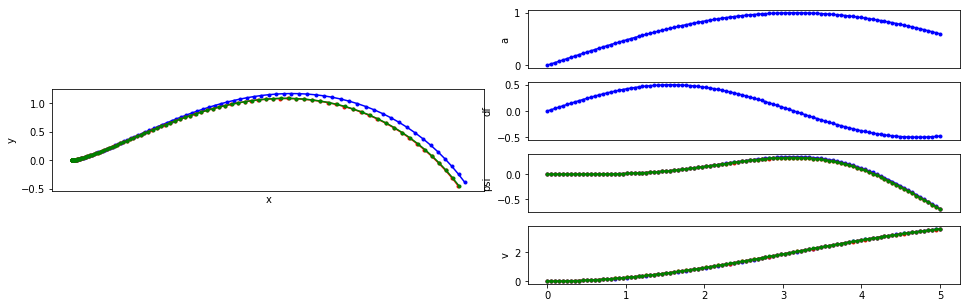

In [2]:
t_end = 5.0
N = 100
dt = t_end/N

l_f = 0.5
l_r = 0.5

ct_model = CT_Kin_Bike_Model(l_r, l_f)
dt_model = DT_Kin_Bike_Model(l_r, l_f, dt)

x_0 = np.zeros(4)
t_span = np.linspace(0, t_end, N)

f = lambda x, t: ct_model.sim(x, u_func(t))
x_traj_ct = spint.odeint(f, x_0, t_span)

x_traj_dt = np.zeros((N, 4))
x_traj_dt[0,:] = x_0
for (i, t) in enumerate(t_span[1:]):
    x_traj_dt[i+1,:] = dt_model.sim(x_traj_dt[i,:], u_func(t)) 
    
x_traj_dt_lin = np.zeros((N, 4))
x_traj_dt_lin[0,:] = x_0
for (i, t) in enumerate(t_span[1:]):
#     A, B, c = ct_model.get_numerical_jacs(x_traj_dt[i,:], u_func(t), 0.001)
#     x_traj_dt_lin[i+1,:] = x_traj_dt[i,:] + dt*(A.dot(x_traj_dt[i,:]) + B.dot(u_func(t)) + c)
    A, B, c = dt_model.get_numerical_jacs(x_traj_dt[i,:], u_func(t), 0.001)
    x_traj_dt_lin[i+1,:] = A.dot(x_traj_dt[i,:]) + B.dot(u_func(t)) + c

plt.ion()
fig = plt.figure()

xy_ax = fig.add_axes([0, 0, 1, 1])
xy_ax.set_xlabel('x')
xy_ax.set_ylabel('y')
xy_ax.set_xticks([])

v_ax = fig.add_axes([1.1, 0, 1, 0.2])
v_ax.set_ylabel('v')

psi_ax = fig.add_axes([1.1, 0.25, 1, 0.2])
psi_ax.set_ylabel('psi')
psi_ax.set_xticks([])

df_ax = fig.add_axes([1.1, 0.5, 1, 0.2])
df_ax.set_ylabel('df')
df_ax.set_xticks([])

a_ax = fig.add_axes([1.1, 0.75, 1, 0.2])
a_ax.set_ylabel('a')
a_ax.set_xticks([])

xy_ax.plot(x_traj_ct[:,0], x_traj_ct[:,1], 'b.-')
xy_ax.plot(x_traj_dt[:,0], x_traj_dt[:,1], 'r.-')
xy_ax.plot(x_traj_dt_lin[:,0], x_traj_dt_lin[:,1], 'g.-')
xy_ax.set_aspect('equal')

psi_ax.plot(t_span, x_traj_ct[:,2], 'b.-')
psi_ax.plot(t_span, x_traj_dt[:,2], 'r.-')
psi_ax.plot(t_span, x_traj_dt_lin[:,2], 'g.-')

v_ax.plot(t_span, x_traj_ct[:,3], 'b.-')
v_ax.plot(t_span, x_traj_dt[:,3], 'r.-')
v_ax.plot(t_span, x_traj_dt_lin[:,3], 'g.-')

df = []
a = []
for t in t_span:
    u = u_func(t)
    df.append(u[0])
    a.append(u[1])
df_ax.plot(t_span, df, 'b.-')
a_ax.plot(t_span, a, 'b.-')

plt.draw()

# lines = xy_ax.plot([], [], 'k')
# for i in range(len(t_span)):
#     l = lines.pop(0)
#     l.remove()
#     del l
    
#     x, y, psi, v = x_traj_ct[i,:]
#     car_x = [x - l_r*np.cos(psi), x + l_f*np.cos(psi)]
#     car_y = [y - l_r*np.sin(psi), y + l_r*np.sin(psi)]
    
#     lines = xy_ax.plot(car_x, car_y, 'k')
    
#     plt.draw()
    
#     display.display(fig)
#     display.clear_output(wait=True)
        
#     time.sleep(0.01)